In [7]:
from IPython.display import SVG

In [8]:
try:
    import svgwrite
except ImportError:
    # if svgwrite is not 'installed' append parent dir of __file__ to sys.path
    import sys, os
    sys.path.insert(0, os.path.abspath(os.path.split(os.path.abspath(__file__))[0]+'/..'))

import svgwrite
from svgwrite import cm, mm   
    
def basic_shapes(name):
    dwg = svgwrite.Drawing(filename=name, debug=True, size=(1000, 1000))
    hlines = dwg.add(dwg.g(id='hlines', stroke='green'))
    for y in range(20):
        hlines.add(dwg.line(start=(2*cm, (2+y)*cm), end=(18*cm, (2+y)*cm)))
    vlines = dwg.add(dwg.g(id='vline', stroke='blue'))
    for x in range(17):
        vlines.add(dwg.line(start=((2+x)*cm, 2*cm), end=((2+x)*cm, 21*cm)))
    shapes = dwg.add(dwg.g(id='shapes', fill='red'))

    # set presentation attributes at object creation as SVG-Attributes
    shapes.add(dwg.circle(center=(15*cm, 8*cm), r='2.5cm', stroke='blue',
                          stroke_width=3))

    # override the 'fill' attribute of the parent group 'shapes'
    shapes.add(dwg.rect(insert=(5*cm, 5*cm), size=(45*mm, 45*mm),
                        fill='blue', stroke='red', stroke_width=3))

    # or set presentation attributes by helper functions of the Presentation-Mixin
    ellipse = shapes.add(dwg.ellipse(center=(10*cm, 15*cm), r=('5cm', '10mm')))
    ellipse.fill('green', opacity=0.5).stroke('black', width=5).dasharray([20, 20])
    dwg.save()

basic_shapes('basic_shapes.svg')

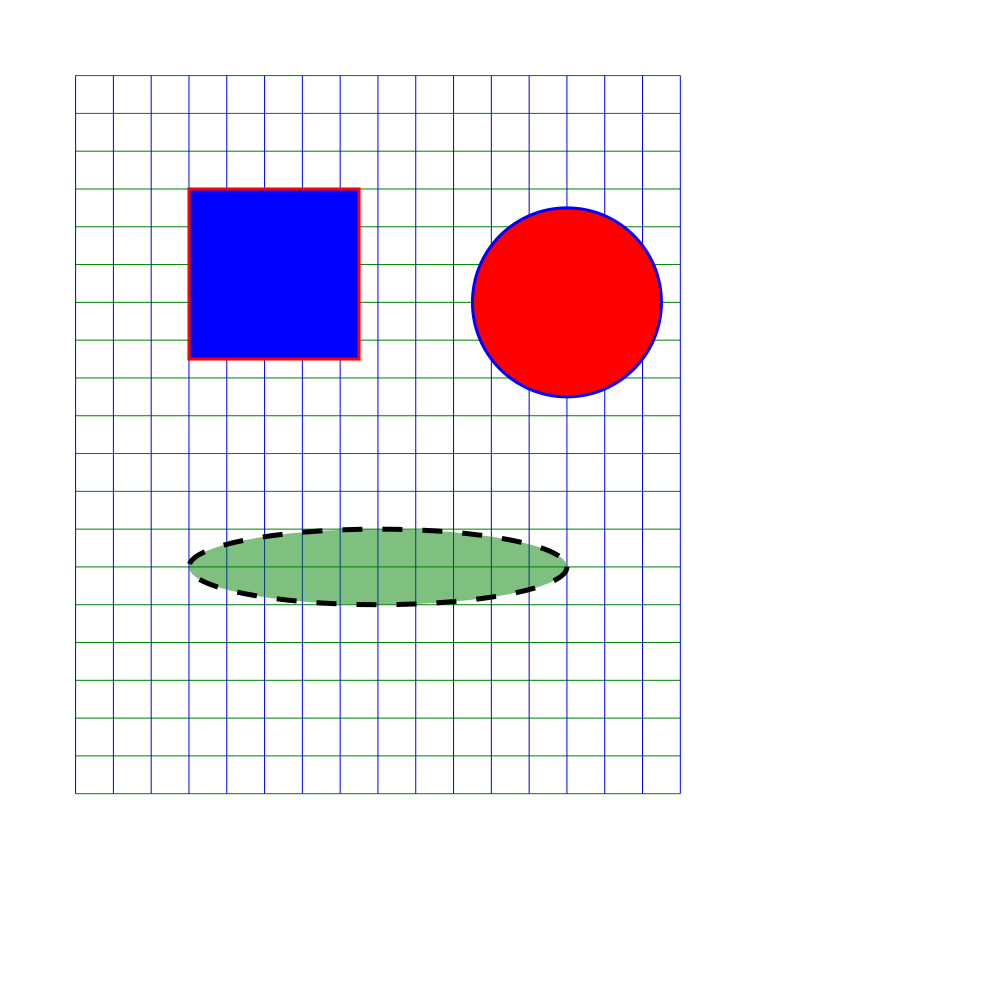

In [9]:
SVG('basic_shapes.svg')


In [5]:
class Rate:
    def __init__(self, rate, units):
        self.rate = rate
        self.dimensionality_verified = False
        self.call = self.dynamic_call
        if not callable(rate):
            # bs_dim_val.raise_if_not(rate, units)
            print('test dim')
            self.dimensionality_verified = True
            self.call = self.static_call
            
    def static_call(self, *args):
        return self.rate
    
    def dynamic_call(self, *args):
        rate = self.rate(*args)
        if not self.dimensionality_verified:
            print('test_dim')
            self.dimensionality_verified = True
        return rate
    
    def __call__(self, *args):
        return self.call(*args)


In [6]:
r1 = Rate(lambda x: 2*x, 3)

In [8]:
r1(3)

test_dim


6

In [10]:
import pint
ur = pint.UnitRegistry()

In [11]:
isinstance(3 * ur.meter, pint.quantity

<Quantity(3, 'meter')>

In [13]:
type(3 * ur.meter)

pint.quantity.build_quantity_class.<locals>.Quantity

In [15]:
isinstance(3*ur.meter, pint.quantity._Quantity)

True